In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
from matplotlib import pylab as plt
import seaborn as sns
import pandas as pd
import imblearn
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import TomekLinks
from imblearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, ConfusionMatrixDisplay
from C45 import C45Classifier

In [3]:
Beans = pd.read_excel('DryBeanDataSet.xlsx')
Beans.head()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,Constantness,EquivDiameter,Colour,...,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,ShapeFactor5,ShapeFactor6,Class,Sort order
0,84648,1132.054,439.915710,248.961941,1.767000,0.824453,86779,1,328.294351,brown,...,0.830027,0.746266,0.005197,0.000994,0.556914,3.487008,0.984066,50.809833,CALI,0.134791
1,39704,736.873,271.659919,186.481404,1.456767,0.727175,40106,1,224.839282,black,...,0.918880,0.82765,0.006842,0.001980,0.685004,1.242335,0.997891,148.508874,DERMASON,0.898848
2,35835,687.914,237.704180,192.176759,1.236904,0.588537,36190,1,213.603696,green,...,0.951588,0.898611,0.006633,0.002668,0.807503,2.813489,0.998803,82.107117,SEKER,0.539684
3,223035,1817.278,680.812555,419.994347,1.621004,0.787040,225889,1,532.894907,brown,...,0.848673,0.782734,0.003052,0.000707,0.612672,3.074472,0.993144,147.347735,BOMBAY,0.149130
4,41957,767.143,287.962974,186.166695,1.546802,0.762918,42310,1,231.130508,brown,...,0.895904,0.80264,0.006863,0.001757,0.644230,2.213954,0.996497,22.893826,SIRA,0.447635


In [4]:
Beans["Colour"] = Beans["Colour"].astype('category')
Beans["Constantness"] = Beans["Constantness"].astype('category')
Beans["Class"] = Beans["Class"].astype('category')
Beans["Extent"] = pd.to_numeric(Beans["Extent"], errors='coerce')
Beans["Compactness"] = pd.to_numeric(Beans["Compactness"], errors='coerce')
Beans["ShapeFactor6"] = pd.to_numeric(Beans["ShapeFactor6"], errors='coerce')
Beans.dtypes

Area                  int64
Perimeter           float64
MajorAxisLength     float64
MinorAxisLength     float64
AspectRation        float64
Eccentricity        float64
ConvexArea            int64
Constantness       category
EquivDiameter       float64
Colour             category
Extent              float64
Solidity            float64
roundness           float64
Compactness         float64
ShapeFactor1        float64
ShapeFactor2        float64
ShapeFactor3        float64
ShapeFactor4        float64
ShapeFactor5        float64
ShapeFactor6        float64
Class              category
Sort order          float64
dtype: object

In [5]:
Beans["Class"].replace('?', np.nan, inplace=True)
Beans["Colour"].replace('?', np.nan, inplace=True)

In [6]:
Beans.isna().sum()

Area                0
Perimeter           0
MajorAxisLength     0
MinorAxisLength     0
AspectRation        0
Eccentricity        0
ConvexArea          0
Constantness        0
EquivDiameter       0
Colour              6
Extent              6
Solidity            0
roundness           0
Compactness        18
ShapeFactor1        0
ShapeFactor2        0
ShapeFactor3        0
ShapeFactor4        0
ShapeFactor5        0
ShapeFactor6        5
Class              17
Sort order          0
dtype: int64

In [7]:
Beans = Beans[Beans['Class'].notna()]
Beans

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,Constantness,EquivDiameter,Colour,...,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,ShapeFactor5,ShapeFactor6,Class,Sort order
0,84648,1132.054,439.915710,248.961941,1.767000,0.824453,86779,1,328.294351,brown,...,0.830027,0.746266,0.005197,0.000994,0.556914,3.487008,0.984066,50.809833,CALI,0.134791
1,39704,736.873,271.659919,186.481404,1.456767,0.727175,40106,1,224.839282,black,...,0.918880,0.827650,0.006842,0.001980,0.685004,1.242335,0.997891,148.508874,DERMASON,0.898848
2,35835,687.914,237.704180,192.176759,1.236904,0.588537,36190,1,213.603696,green,...,0.951588,0.898611,0.006633,0.002668,0.807503,2.813489,0.998803,82.107117,SEKER,0.539684
3,223035,1817.278,680.812555,419.994347,1.621004,0.787040,225889,1,532.894907,brown,...,0.848673,0.782734,0.003052,0.000707,0.612672,3.074472,0.993144,147.347735,BOMBAY,0.149130
4,41957,767.143,287.962974,186.166695,1.546802,0.762918,42310,1,231.130508,brown,...,0.895904,0.802640,0.006863,0.001757,0.644230,2.213954,0.996497,22.893826,SIRA,0.447635
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13606,23018,578.382,203.761000,144.297607,1.412089,0.706041,23465,1,171.194123,black,...,0.864665,0.840171,0.008852,0.002721,0.705888,2.197446,0.996776,85.821969,DERMASON,0.764478
13607,69773,1095.057,387.116310,231.153291,1.674717,0.802155,71055,1,298.056610,brown,...,0.731179,0.769941,0.005548,0.001203,0.592809,1.004792,0.992787,152.980591,BARBUNYA,0.679735
13608,55773,968.988,347.920243,204.491191,1.701395,0.809040,57047,0,266.481499,brown,...,0.746444,0.765927,0.006238,0.001324,0.586644,2.219590,0.998113,102.437378,BARBUNYA,0.946849
13609,64235,1005.875,409.304636,201.686606,2.029409,0.870169,65018,1,285.983465,white,...,0.797799,0.698706,0.006372,0.000937,0.488190,2.078504,0.990736,174.754039,HOROZ,0.046135


In [8]:
Beans.isna().sum()

Area                0
Perimeter           0
MajorAxisLength     0
MinorAxisLength     0
AspectRation        0
Eccentricity        0
ConvexArea          0
Constantness        0
EquivDiameter       0
Colour              6
Extent              6
Solidity            0
roundness           0
Compactness        18
ShapeFactor1        0
ShapeFactor2        0
ShapeFactor3        0
ShapeFactor4        0
ShapeFactor5        0
ShapeFactor6        5
Class               0
Sort order          0
dtype: int64

### Drop incorrectly captured outliers 

In [9]:
Beans = Beans.drop([2762, 3941, 4780, 5884])
Beans = Beans.reset_index(drop=True)

In [10]:
from myTree import ClassificationTree

X = Beans.drop(['Sort order', 'Class'], axis = 1)
y = Beans['Class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

mytree = ClassificationTree(max_depth=None, min_samples_split=2, random_state=42, data_split_size=0.2)
mytree.fit(X_train, y_train)

In [11]:
mytree.print_tree(mytree.root)

0 Node: Split on 'Constantness'
  If Constantness == 1:
  1 Node: Split on 'MajorAxisLength'
    If MajorAxisLength == < 322.524735637631:
    2 Node: Split on 'MinorAxisLength'
      If MinorAxisLength == < 180.70409671876598:
      3 Node: Split on 'Perimeter'
        If Perimeter == < 702.9345000000001:
        4 Node: Split on 'ConvexArea'
          If ConvexArea == < 32461.5:
          Leaf: Predict DERMASON
          If ConvexArea == >= 32461.5:
          5 Node: Split on 'roundness'
            If roundness == < 0.894353553667066:
            6 Node: Split on 'Solidity'
              If Solidity == < 0.990041473999562:
              7 Node: Split on 'ShapeFactor1'
                If ShapeFactor1 == < 0.0077134194005632605:
                8 Node: Split on 'ShapeFactor4'
                  If ShapeFactor4 == < 1.747325315245585:
                  Leaf: Predict DERMASON
                  If ShapeFactor4 == >= 1.747325315245585:
                  9 Node: Split on 'Area'
            

In [12]:
y_pred = mytree.predict(X_train)
(y_train == y_pred).sum() / len(y_train)

0.9627483443708609

In [13]:
y_pred = mytree.predict(X_test)
y_pred

1061     DERMASON
3881         SIRA
3563     BARBUNYA
11843        SIRA
6654         CALI
           ...   
577      DERMASON
12630    BARBUNYA
10083       SEKER
8743       BOMBAY
4337         CALI
Length: 2718, dtype: object

In [14]:
(y_test == y_pred).sum() / len(y_test)

0.9477557027225901

In [15]:
y_test_str = np.array(y_test, dtype=str)
print(np.unique(y_test_str))
y_pred_str = np.array(y_pred, dtype=str)
print(np.unique(y_pred_str))
print(pd.Series(y_pred_str).value_counts())
print('Classification Report:')
print(classification_report(y_test_str, y_pred_str, target_names=np.unique(y_test_str)))

['BARBUNYA' 'BOMBAY' 'CALI' 'DERMASON' 'HOROZ' 'SEKER' 'SIRA']
['BARBUNYA' 'BOMBAY' 'CALI' 'DERMASON' 'HOROZ' 'SEKER' 'SIRA']
DERMASON    731
SIRA        485
SEKER       405
HOROZ       369
CALI        340
BARBUNYA    280
BOMBAY      108
dtype: int64
Classification Report:
              precision    recall  f1-score   support

    BARBUNYA       0.91      0.88      0.89       291
      BOMBAY       0.98      1.00      0.99       106
        CALI       0.91      0.92      0.91       337
    DERMASON       0.95      0.96      0.96       722
       HOROZ       0.99      0.99      0.99       372
       SEKER       0.98      0.99      0.98       404
        SIRA       0.92      0.92      0.92       486

    accuracy                           0.95      2718
   macro avg       0.95      0.95      0.95      2718
weighted avg       0.95      0.95      0.95      2718



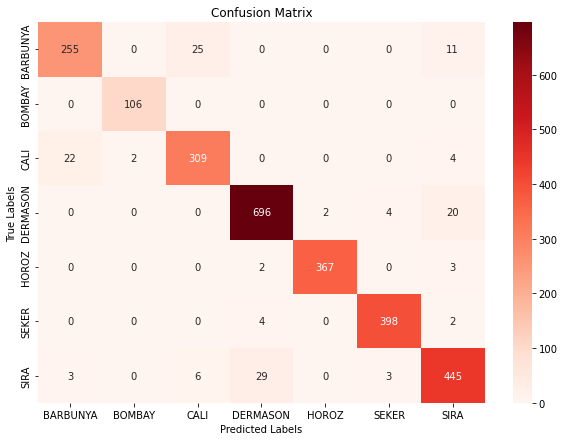

In [16]:
from sklearn.metrics import confusion_matrix
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Create confusion matrix
cm = confusion_matrix(y_test_str, y_pred_str, labels=np.unique(y_test_str))

# Convert to DataFrame for better visualization
cm_df = pd.DataFrame(cm, index=np.unique(y_test_str), columns=np.unique(y_test_str))

# Plot confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cm_df, annot=True, fmt='d', cmap='Reds', cbar=True, 
            xticklabels=np.unique(y_test_str), yticklabels=np.unique(y_test_str))
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [17]:
tree = mytree.visualize_tree()
tree.render('Plots/Classification tree', format='png', cleanup=True)


(process:9536): GLib-GIO-WARNING **: 19:15:02.156: Unexpectedly, UWP app `38526MediaLife.ZipPlus_2.0.4.0_x86__1crh1k73ty8mg' (AUMId `38526MediaLife.ZipPlus_1crh1k73ty8mg!ZipExtractor') supports 89 extensions but has no verbs


'Plots\\Classification tree.png'

In [200]:
from myTree import Tuning

clf = Tuning()
depth_list = [8,9,10,11,12]
split_list = [2,3,4,5]
scores, means = clf.grid_search(X, y, depth_list, split_list, k=5)
clf.readable_scores(scores, depth_list, split_list)

Calculating Trees: 100%|█████████████████████████████████████████████████████████████| 5/5 [4:20:57<00:00, 3131.51s/it]

8 2 [0.9484915378955114, 0.9470198675496688, 0.9470198675496688, 0.9422369389256806, 0.9389256806475349]
8 3 [0.9484915378955114, 0.9470198675496688, 0.9470198675496688, 0.9422369389256806, 0.9389256806475349]
8 4 [0.9484915378955114, 0.9470198675496688, 0.9470198675496688, 0.9422369389256806, 0.9389256806475349]
8 5 [0.9484915378955114, 0.9470198675496688, 0.9470198675496688, 0.94186902133922, 0.9385577630610743]
9 2 [0.9484915378955114, 0.9484915378955114, 0.9506990434142752, 0.9466519499632082, 0.9499632082413539]
9 3 [0.9484915378955114, 0.9481236203090507, 0.9506990434142752, 0.9466519499632082, 0.9492273730684326]
9 4 [0.9484915378955114, 0.9470198675496688, 0.9506990434142752, 0.9466519499632082, 0.9492273730684326]
9 5 [0.9484915378955114, 0.9470198675496688, 0.9506990434142752, 0.9462840323767476, 0.948859455481972]
10 2 [0.9473877851361295, 0.9514348785871964, 0.948859455481972, 0.9455481972038263, 0.9484915378955114]
10 3 [0.9473877851361295, 0.9518027961736572, 0.9488594554

In [201]:
clf.readable_scores(means, depth_list, split_list)

8 2 0.944738778513613
8 3 0.944738778513613
8 4 0.944738778513613
8 5 0.9445916114790286
9 2 0.948859455481972
9 3 0.9486387049300955
9 4 0.9484179543782194
9 5 0.948270787343635
10 2 0.9483443708609272
10 3 0.948270787343635
10 4 0.9474613686534216
10 5 0.9478292862398823
11 2 0.9475349521707137
11 3 0.9473877851361296
11 4 0.9476821192052981
11 5 0.9479764532744663
12 2 0.9479028697571744
12 3 0.9476821192052979
12 4 0.9477557027225902
12 5 0.9467255334805003


In [92]:
import numpy as np
from scipy.stats import kruskal
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.neighbors import KNeighborsClassifier

# Perform the Kruskal-Wallis test
kruskal_result = kruskal(scores[0],scores[1])

# Print results
print(f"Kruskal-Wallis H-statistic: {kruskal_result.statistic}")
print(f"Kruskal-Wallis p-value: {kruskal_result.pvalue}")

if kruskal_result.pvalue < 0.05:
    print("There is a significant difference between the performance of different k values.")
else:
    print("No significant difference between the performance of different k values.")

Kruskal-Wallis H-statistic: 0.0
Kruskal-Wallis p-value: 1.0
No significant difference between the performance of different k values.


In [80]:
from scipy.stats import f_oneway

# Perform ANOVA test
stat, p_value = f_oneway(*scores)

print(f"ANOVA statistic: {stat}")
print(f"P-value: {p_value}")

# Interpret the result
if p_value < 0.05:
    print("There is a statistically significant difference between the groups.")
else:
    print("No statistically significant difference between the groups.")

ANOVA statistic: 0.914544709753302
P-value: 0.5671975663614353
No statistically significant difference between the groups.


In [103]:
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from scipy.stats import ttest_rel

for i in range(19):
    # Perform paired t-test
    stat, p_value = ttest_rel(scores[i], scores[i+1])

#     if p_value < 0.1:
    print(f"{i} {i+1}Paired t-test p-value: {p_value}")

0 1Paired t-test p-value: nan
1 2Paired t-test p-value: nan
2 3Paired t-test p-value: 0.17780780835622126
3 4Paired t-test p-value: 0.0961533574296851
4 5Paired t-test p-value: 0.20799999999998814
5 6Paired t-test p-value: 0.373900966300059
6 7Paired t-test p-value: 0.17780780835622126
7 8Paired t-test p-value: 0.9504295946484862
8 9Paired t-test p-value: 0.7040000000000521
9 10Paired t-test p-value: 0.18015182755781498
10 11Paired t-test p-value: 0.6548342365617601
11 12Paired t-test p-value: 0.8641515134165674
12 13Paired t-test p-value: 0.373900966300059
13 14Paired t-test p-value: 0.587049639787068
14 15Paired t-test p-value: 0.6135457051576056
15 16Paired t-test p-value: 0.9651789987517186
16 17Paired t-test p-value: 0.20799999999998814
17 18Paired t-test p-value: 0.875718143942998
18 19Paired t-test p-value: 0.11476192246456868


In [212]:
from myTree import ClassificationTree

X = Beans.drop(['Sort order', 'Class'], axis = 1)
y = Beans['Class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

mytree = ClassificationTree(max_depth=9, min_samples_split=2, random_state=0, data_split_size=0.2)
mytree.fit(X_train, y_train)

In [213]:
mytree.print_tree(mytree.root)

0 Node: Split on 'Constantness'
  If Constantness == 1:
  1 Node: Split on 'MajorAxisLength'
    If MajorAxisLength == < 310.4853055111615:
    2 Node: Split on 'MinorAxisLength'
      If MinorAxisLength == < 180.70409671876598:
      3 Node: Split on 'Perimeter'
        If Perimeter == < 702.9345000000001:
        Leaf: Predict DERMASON
        If Perimeter == >= 702.9345000000001:
        4 Node: Split on 'AspectRation'
          If AspectRation == < 1.7654639322037151:
          5 Node: Split on 'roundness'
            If roundness == < 0.8854766908708676:
            6 Node: Split on 'Area'
              If Area == < 37228.0:
              Leaf: Predict DERMASON
              If Area == >= 37228.0:
              7 Node: Split on 'Colour'
                If Colour == brown:
                Leaf: Predict SIRA
                If Colour == black:
                Leaf: Predict DERMASON
                If Colour == white:
                Leaf: Predict HOROZ
            If roundness == >=

In [214]:
X_new_train, X_val, y_new_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=0)
y_pred = mytree.predict(X_new_train)
(y_pred == y_new_train).sum() / len(y_new_train)

0.9683799011153271

In [215]:
y_pred = mytree.predict(X_train)
(y_train == y_pred).sum() / len(y_train)

0.9688189845474614

In [216]:
y_pred = mytree.predict(X_test)
y_pred

3514         SIRA
10512        SIRA
5948        HOROZ
9574        SEKER
12521       HOROZ
           ...   
7077         SIRA
2664     BARBUNYA
12616    BARBUNYA
9552        HOROZ
9310         SIRA
Length: 2718, dtype: object

In [217]:
(y_test == y_pred).sum() / len(y_test)

0.9551140544518028

In [218]:
y_test_str = np.array(y_test, dtype=str)
print(np.unique(y_test_str))
y_pred_str = np.array(y_pred, dtype=str)
print(np.unique(y_pred_str))
print(pd.Series(y_pred_str).value_counts())
print('Classification Report:')
print(classification_report(y_test_str, y_pred_str, target_names=np.unique(y_test_str)))

['BARBUNYA' 'BOMBAY' 'CALI' 'DERMASON' 'HOROZ' 'SEKER' 'SIRA']
['BARBUNYA' 'BOMBAY' 'CALI' 'DERMASON' 'HOROZ' 'SEKER' 'SIRA']
DERMASON    725
SIRA        507
SEKER       392
HOROZ       383
BARBUNYA    307
CALI        306
BOMBAY       98
dtype: int64
Classification Report:
              precision    recall  f1-score   support

    BARBUNYA       0.86      0.91      0.88       289
      BOMBAY       1.00      1.00      1.00        98
        CALI       0.93      0.89      0.91       323
    DERMASON       0.95      0.98      0.97       698
       HOROZ       0.99      0.99      0.99       383
       SEKER       0.99      0.99      0.99       391
        SIRA       0.97      0.92      0.95       536

    accuracy                           0.96      2718
   macro avg       0.96      0.96      0.96      2718
weighted avg       0.96      0.96      0.96      2718



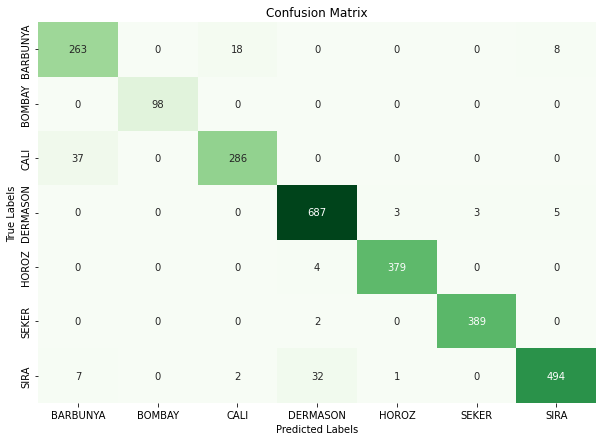

In [219]:
from sklearn.metrics import confusion_matrix
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Create confusion matrix
cm = confusion_matrix(y_test_str, y_pred_str, labels=np.unique(y_test_str))

# Convert to DataFrame for better visualization
cm_df = pd.DataFrame(cm, index=np.unique(y_test_str), columns=np.unique(y_test_str))

# Plot confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cm_df, annot=True, fmt='d', cmap='Greens', cbar=False, 
            xticklabels=np.unique(y_test_str), yticklabels=np.unique(y_test_str))
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.savefig("Plots/Classification tree confusion matrix")
plt.show()

In [243]:
tree = mytree.visualize_tree()
tree.render('Plots/Classification tree', format='png', cleanup=True)


(process:11024): GLib-GIO-WARNING **: 17:06:01.154: Unexpectedly, UWP app `38526MediaLife.ZipPlus_2.0.4.0_x86__1crh1k73ty8mg' (AUMId `38526MediaLife.ZipPlus_1crh1k73ty8mg!ZipExtractor') supports 89 extensions but has no verbs


'Plots\\Classification tree.png'

In [221]:
y.value_counts()

DERMASON    3541
SIRA        2632
SEKER       2025
HOROZ       1927
CALI        1628
BARBUNYA    1316
BOMBAY       521
Name: Class, dtype: int64